# Neural Networks - Image Classification

### [Cifar-10](https://www.cs.toronto.edu/~kriz/cifar.html)
___

In this project, I will be creating an image classifier which classifies every image in the Cifar-10 dataset:

- Airplanes
- Automobiles
- Birds
- Cats
- Dogs
- Deers
- Frogs
- Horses
- Ships
- Trucks

Then, using data visualisation tools, I will display a line graph which clearly shows how the image classification accuracy of my model increased and the output of the loss function (measuring the difference between estimated and true value) decreased throughout training.

###### Importing Necessary Packages 

In [132]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

###### Loading the Dataset

In [94]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

###### Splitting the Dataset into Subsets

In [96]:
# Important for reducing risk of bias in evaluation and validation process (detect overfitting and underfitting)     
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

###### Normalising the Inputs

In [124]:
# Here we are rescaling greyscale images from 0-255 to 0-1 pixel values - mathematical convenience
x_train = x_train/255
x_test = x_test/255
x_valid = x_valid/255

print(x_train.shape, x_test.shape, x_valid.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)


###### Building the CNN Model

In [98]:
num_classes = len(np.unique(y_train))

c10 = Sequential()
c10.add(Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(32,32,3)))
c10.add(MaxPooling2D(pool_size=(2,2)))
c10.add(Flatten())
c10.add(Dense(num_classes, activation="softmax"))

c10.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                81930     
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


###### Compile Model

In [99]:
c10.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

###### One-Hot Encoding 

In [100]:
# One-hot encoded data better for predictions made by machine learning algorithms
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_valid = to_categorical(y_valid, num_classes)

###### Train Model

In [108]:
start = time.time()
fit = c10.fit(x_train, y_train, batch_size=500, epochs=20, validation_data=(x_valid, y_valid))
end = time.time()
print("Training time: %0.2f seconds" %(end-start))

Epoch 1/20
80/80 [==============================] - 13s 158ms/step - loss: 0.9204 - accuracy: 0.6891 - val_loss: 1.0683 - val_accuracy: 0.6303
Epoch 2/20
80/80 [==============================] - 11s 142ms/step - loss: 0.9110 - accuracy: 0.6918 - val_loss: 1.0476 - val_accuracy: 0.6393
Epoch 3/20
80/80 [==============================] - 11s 140ms/step - loss: 0.9034 - accuracy: 0.6936 - val_loss: 1.0423 - val_accuracy: 0.6386
Epoch 4/20
80/80 [==============================] - 11s 141ms/step - loss: 0.8988 - accuracy: 0.6974 - val_loss: 1.0662 - val_accuracy: 0.6269
Epoch 5/20
80/80 [==============================] - 13s 156ms/step - loss: 0.8891 - accuracy: 0.6994 - val_loss: 1.0622 - val_accuracy: 0.6296
Epoch 6/20
80/80 [==============================] - 12s 150ms/step - loss: 0.8838 - accuracy: 0.7006 - val_loss: 1.0320 - val_accuracy: 0.6433
Epoch 7/20
80/80 [==============================] - 12s 144ms/step - loss: 0.8719 - accuracy: 0.7057 - val_loss: 1.0328 - val_accuracy: 0.6445

###### Final Evaluation

In [109]:
scores = c10.evaluate(x_test, y_test, batch_size=500, verbose=1)
print("Accuracy: %.2f, Loss: %.3f" % (100*scores[1], scores[0]))

20/20 [==============================] - 1s 44ms/step - loss: 1.0221 - accuracy: 0.6521
Accuracy: 65.21, Loss: 1.022


###### Plotting the Accuracy and Loss of  Model

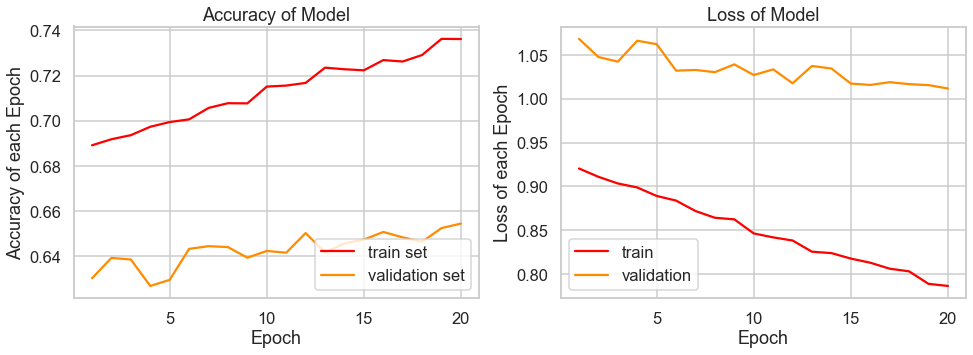

In [123]:
def model_accuracy_graph(track):
    sns.set_context("talk")
    sns.set_style("whitegrid")
    
    fig, axs = plt.subplots(1,2,figsize=(16, 5))
    
    # Accuracy
    axs[0].plot(range(1,21),track.history['accuracy'],color='red')
    axs[0].plot(range(1,21),track.history['val_accuracy'],color='darkorange')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy of each Epoch')
    axs[0].set_title('Accuracy of Model')
    axs[0].legend(['train set','validation set'],loc=4)
    
    # Loss
    axs[1].plot(range(1,21),track.history['loss'],color='red')
    axs[1].plot(range(1,21),track.history['val_loss'],color='darkorange')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss of each Epoch')
    axs[1].set_xlabel('Epoch')
    axs[1].set_title('Loss of Model')
    axs[1].legend(['train','validation'],loc=3)
    
    plt.show()
    
model_accuracy_graph(fit)